In [2]:
import matplotlib.pyplot as plt
import matplotlib_inline
import pandas as pd
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import os

In [3]:
df = pd.concat([pd.read_parquet(f"chunk_{j}.parquet") for j in (range(1, 20))])

## Article type stats

In [4]:
for type in df['type'].unique():
    name = f'{type}_df'
    globals()[name] = df[df['type'] == type]

    print(f'Articles of type {type}: {len(globals()[name])}')

    print(f'{type} mean length: {globals()[name]["length"].mean()}')
    print(f'{type} median length: {globals()[name]["length"].median()}')

    print(f'{type} mean distinct words: {globals()[name]["length_distinct_words"].mean()}')
    print(f'{type} median distinct words: {globals()[name]["length_distinct_words"].median()}')

    print('\n')

Articles of type political: 187123
political mean length: 320.51617385356155
political median length: 215.0
political mean distinct words: 202.32258461012276
political median distinct words: 175.0


Articles of type fake: 100789
fake mean length: 254.3976425998869
fake median length: 148.0
fake mean distinct words: 150.12830765262083
fake median distinct words: 106.0


Articles of type satire: 12599
satire mean length: 151.2562108103818
satire median length: 129.0
satire mean distinct words: 104.49456306056037
satire median distinct words: 103.0


Articles of type reliable: 208750
reliable mean length: 293.0042682634731
reliable median length: 203.0
reliable mean distinct words: 185.93234011976048
reliable median distinct words: 145.0


Articles of type conspiracy: 93547
conspiracy mean length: 223.53878798892535
conspiracy median length: 81.0
conspiracy mean distinct words: 134.56394112050626
conspiracy median distinct words: 64.0


Articles of type unreliable: 31539
unreliable mean l

## Article lengths vs. number of distinct words

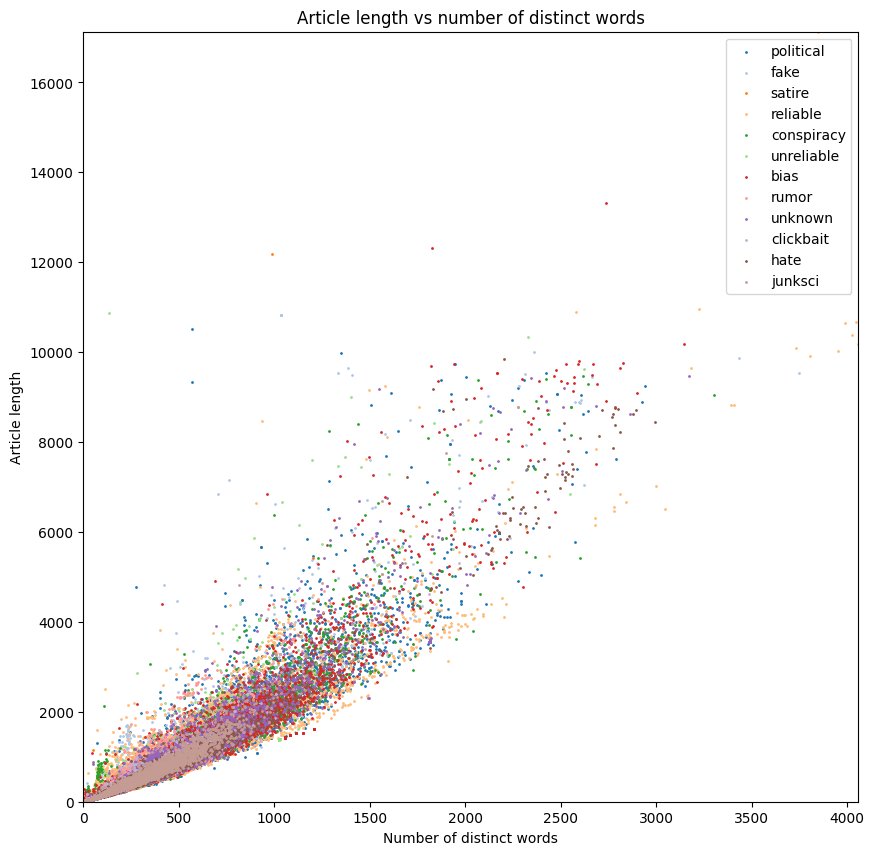

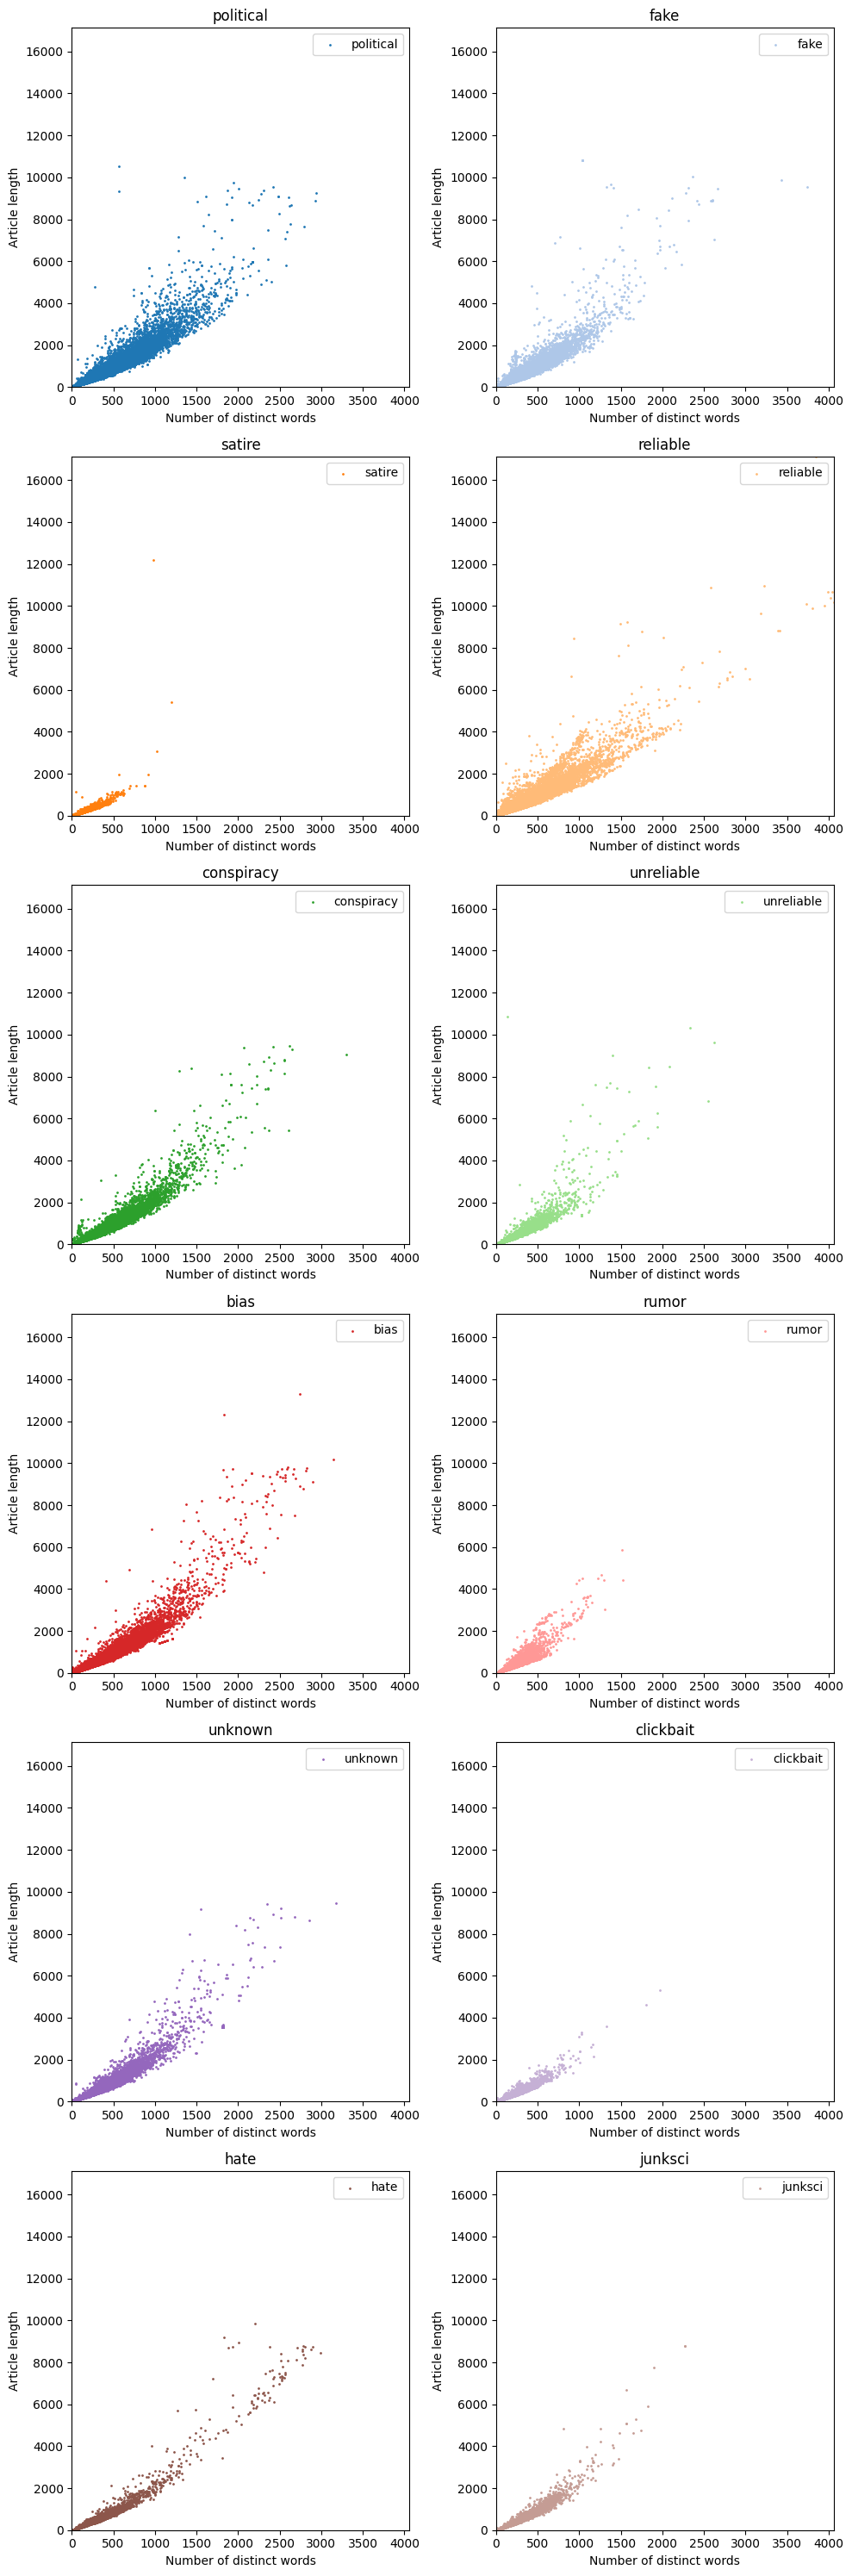

In [5]:
# Calculate global min and max for length and length_distinct_words
global_max_length = df['length'].max()
global_max_length_distinct_words = df['length_distinct_words'].max()

# Main plot with all data points
fig1, ax1 = plt.subplots(figsize=(10, 10))

# Use a color map to automatically assign colors
color_map = plt.get_cmap('tab20')

# Plot each type with a different color and set the size of the dots
dot_size = 1  # Adjust this value to change the size of the dots
for i, article_type in enumerate(df['type'].unique()):
    type_df = df[df['type'] == article_type]
    ax1.scatter(type_df['length_distinct_words'], type_df['length'], color=color_map(i), label=article_type, s=dot_size)

ax1.set_title('Article length vs number of distinct words')
ax1.set_xlabel('Number of distinct words')
ax1.set_ylabel('Article length')
ax1.legend()
ax1.set_xlim(0, global_max_length_distinct_words)
ax1.set_ylim(0, global_max_length)

# Create a new figure for the grid of subplots
num_types = len(df['type'].unique())
ncols = 2
nrows = (num_types + 1) // ncols  # Calculate the number of rows needed

fig2, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 5 * nrows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each type in a separate subplot
for i, article_type in enumerate(df['type'].unique()):
    type_df = df[df['type'] == article_type]
    ax = axes[i]
    ax.scatter(type_df['length_distinct_words'], type_df['length'], color=color_map(i), label=article_type, s=dot_size)
    ax.set_title(f'{article_type}')
    ax.set_xlabel('Number of distinct words')
    ax.set_ylabel('Article length')
    ax.legend()
    ax.set_xlim(0, global_max_length_distinct_words)
    ax.set_ylim(0, global_max_length)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig2.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figures
fig1.savefig('data/article_length_vs_distinct_words.png')
fig2.savefig('data/article_length_vs_distinct_words_by_type.png')
plt.show()

## Distributions of article lengths pr. type

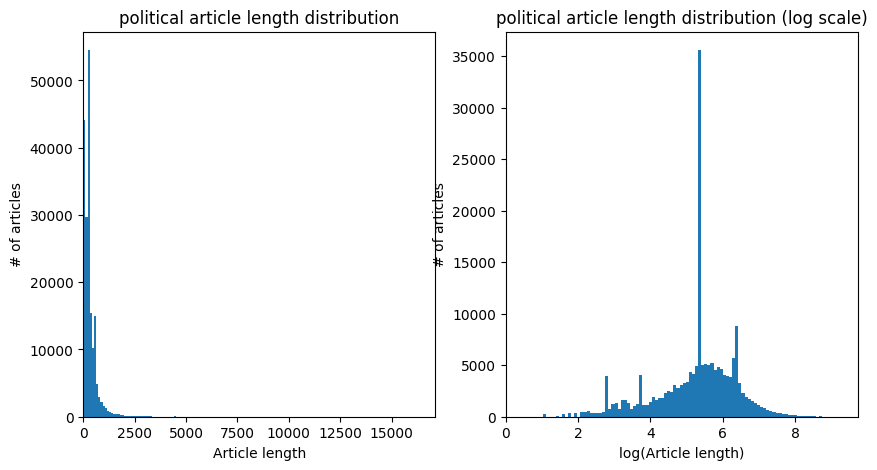

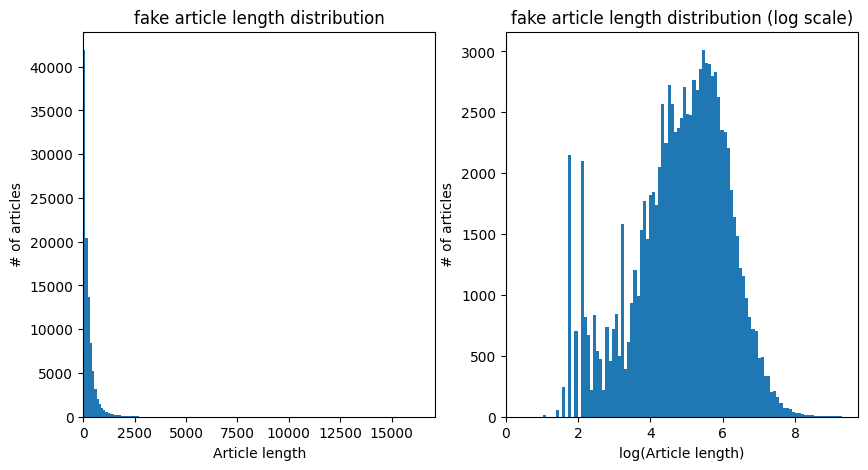

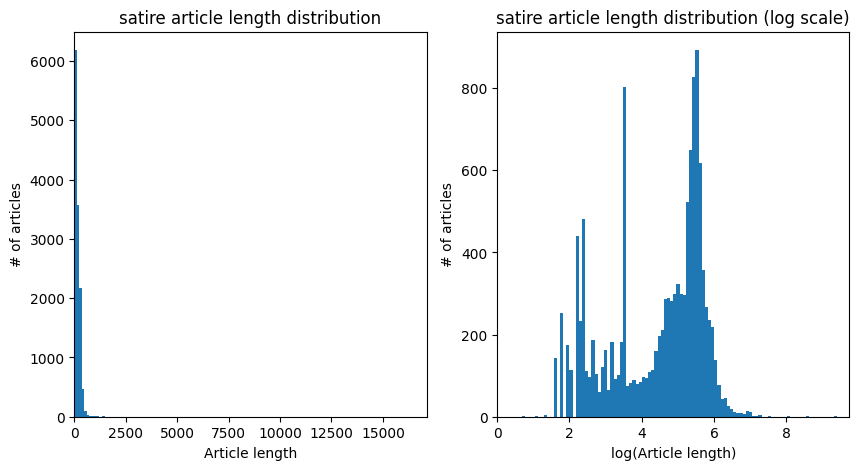

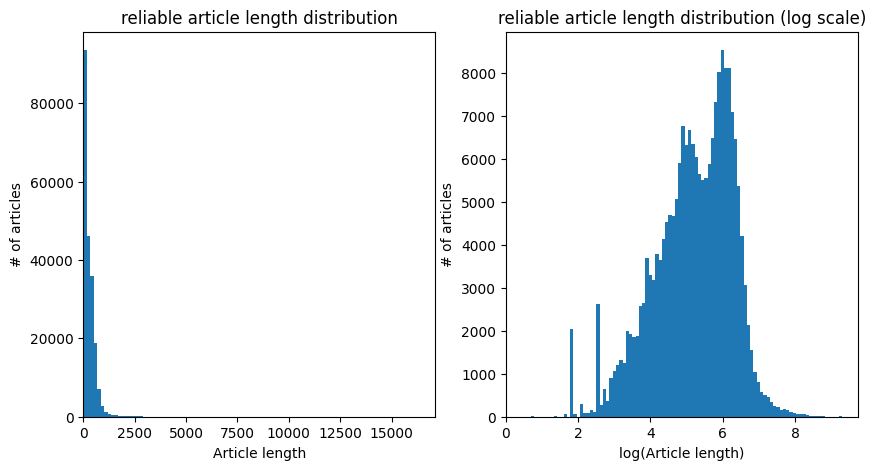

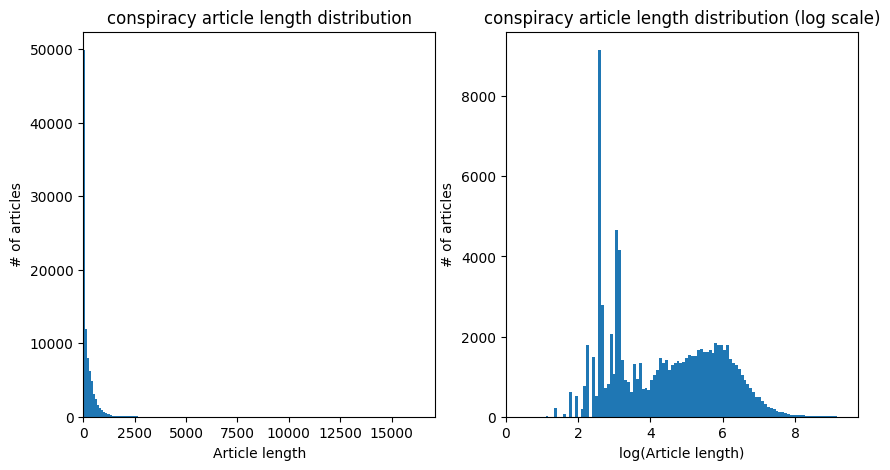

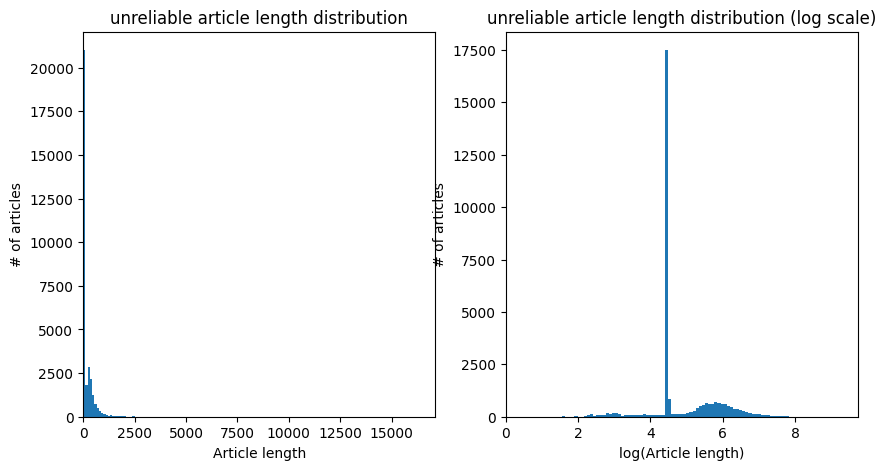

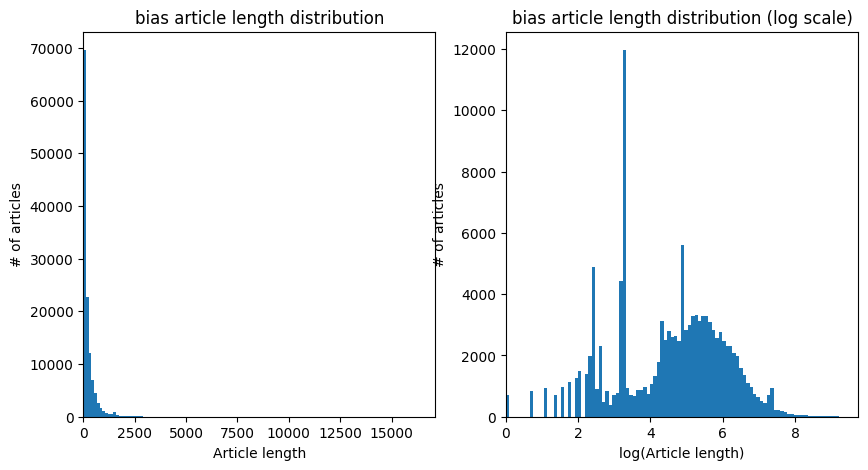

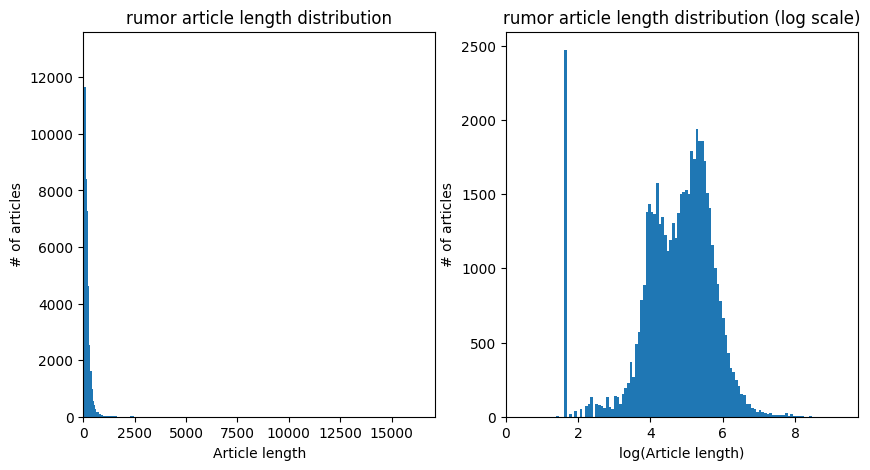

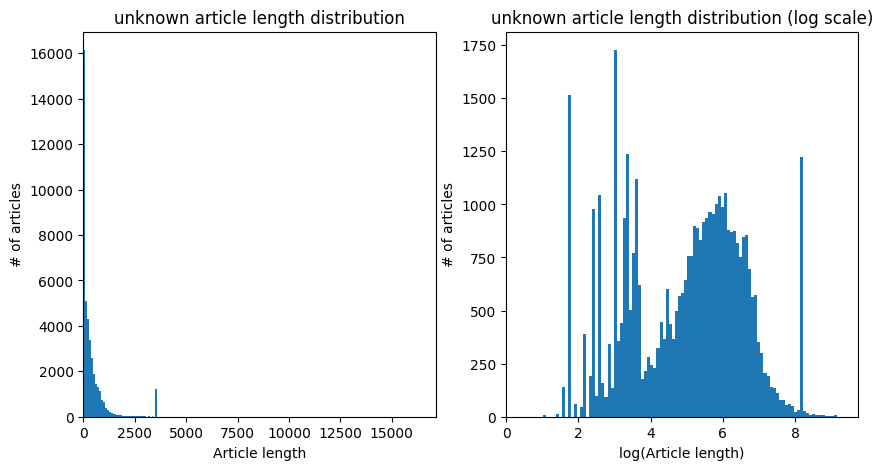

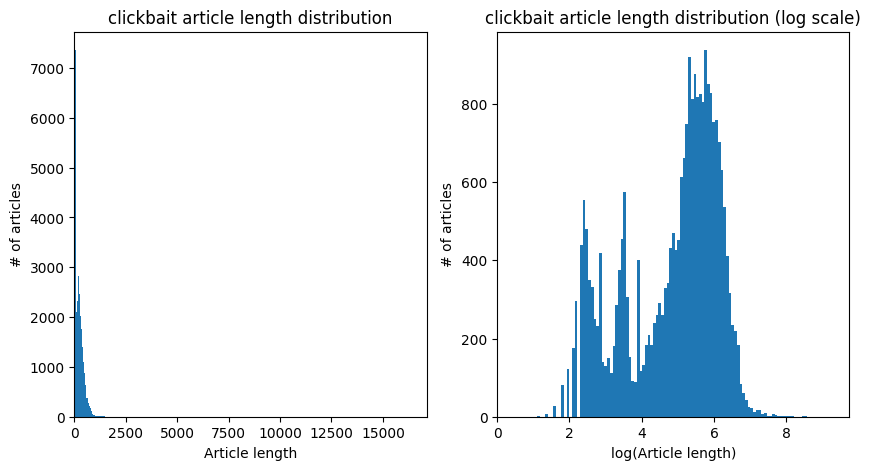

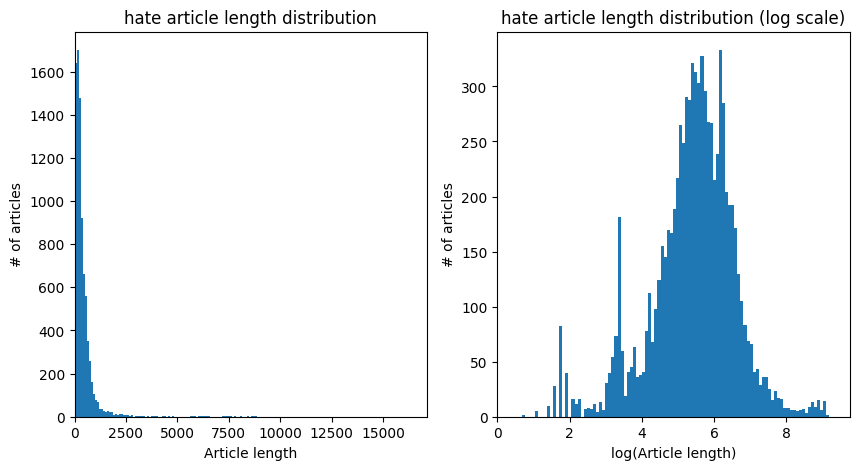

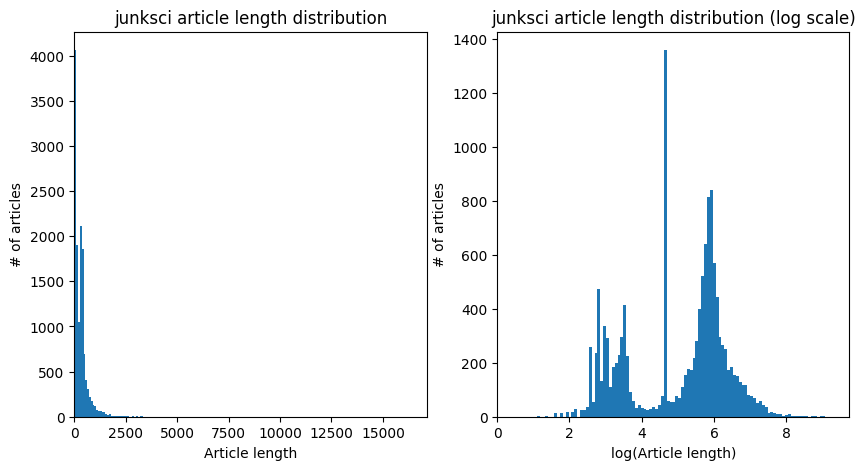

In [6]:
# Create the directory if it does not exist
output_dir = 'data/article_length_distributions'
os.makedirs(output_dir, exist_ok=True)

# Calculate global min and max for length and log(length)
global_max_length = df['length'].max()
global_max_log_length = np.log(df['length']).max()

for article_type in df['type'].unique():
    fig1 = plt.figure(figsize=(10, 5))
    # Adding two subplots side by side
    ax1 = fig1.add_subplot(1, 2, 1)
    ax2 = fig1.add_subplot(1, 2, 2)
    
    type_df = df[df['type'] == article_type]
    
    # The first subplot shows the distribution of the length of the articles
    ax1.hist(type_df['length'], bins=100)
    ax1.set_title(f'{article_type} article length distribution')
    ax1.set_xlabel('Article length')
    ax1.set_ylabel('# of articles')
    ax1.set_xlim(0, global_max_length)  # Set uniform x-axis limits

    # The second subplot shows the distribution of the log of the length of the articles to better visualize the distribution
    ax2.hist(np.log(type_df['length']), bins=100)
    ax2.set_title(f'{article_type} article length distribution (log scale)')
    ax2.set_xlabel('log(Article length)')
    ax2.set_ylabel('# of articles')
    ax2.set_xlim(0, global_max_log_length)  # Set uniform x-axis limits

    fig1.savefig(f'{output_dir}/{article_type}_article_length_distribution.png')
    plt.show()

## Most common words

In [7]:
word_counts = {}
for content in df['content']:
    for word in content:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

C:\Users\fesso\AppData\Local\Temp\ipykernel_1836\3440859657.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()


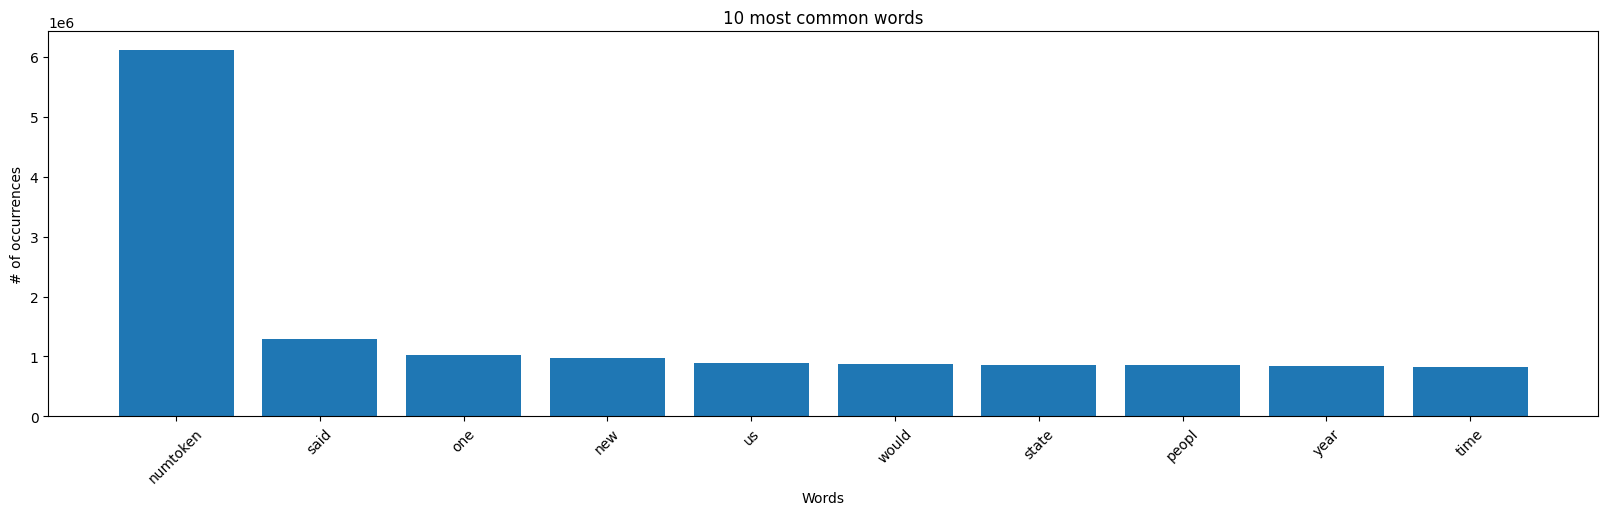

In [8]:
fig1 = plt.figure(figsize=(20, 5))
ax1 = fig1.add_subplot(111)
ax1.bar(*zip(*sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:10]))
ax1.set_title('10 most common words')
ax1.set_xlabel('Words')
plt.xticks(rotation=45)
ax1.set_ylabel('# of occurrences')
fig1.savefig('data/10_most_common_words.png')
fig1.show()

## Most common words by type

C:\Users\fesso\AppData\Local\Temp\ipykernel_1836\3751852806.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()


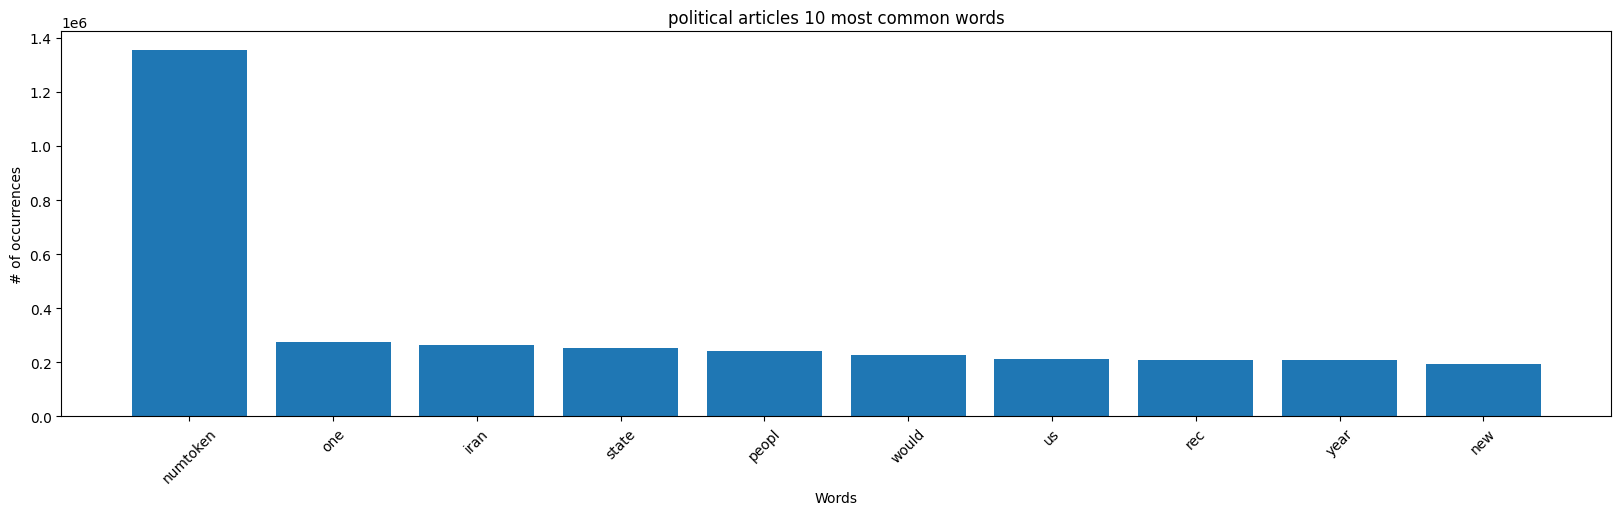

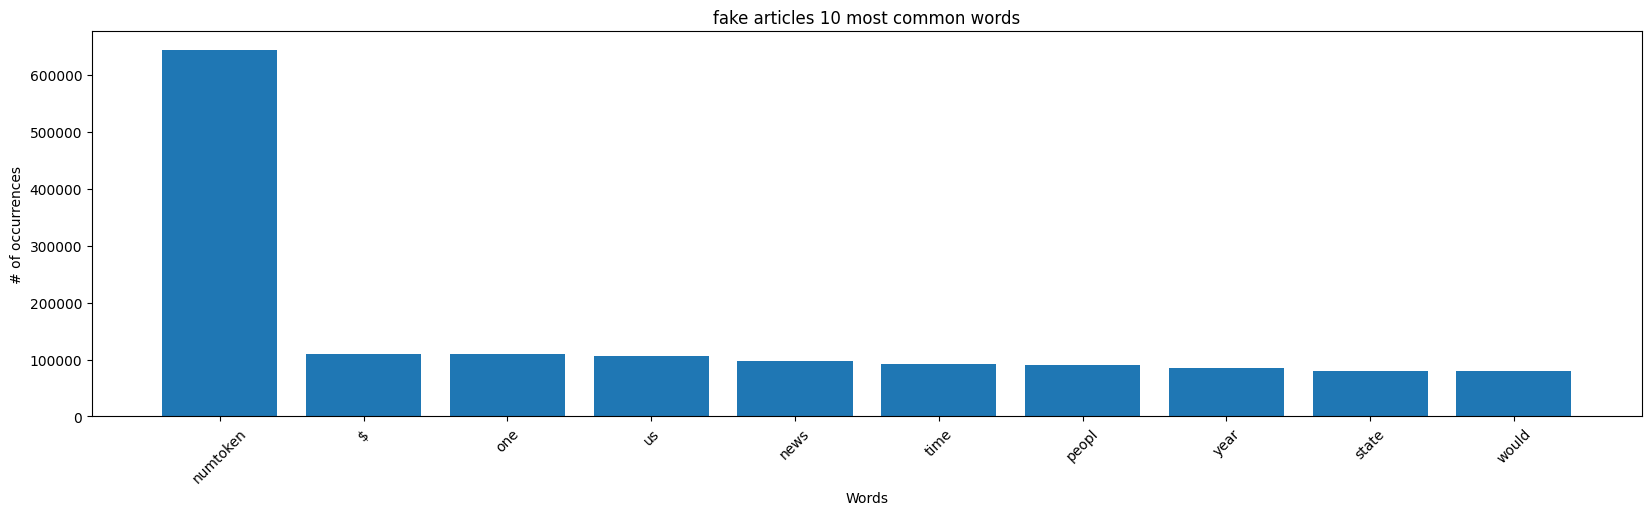

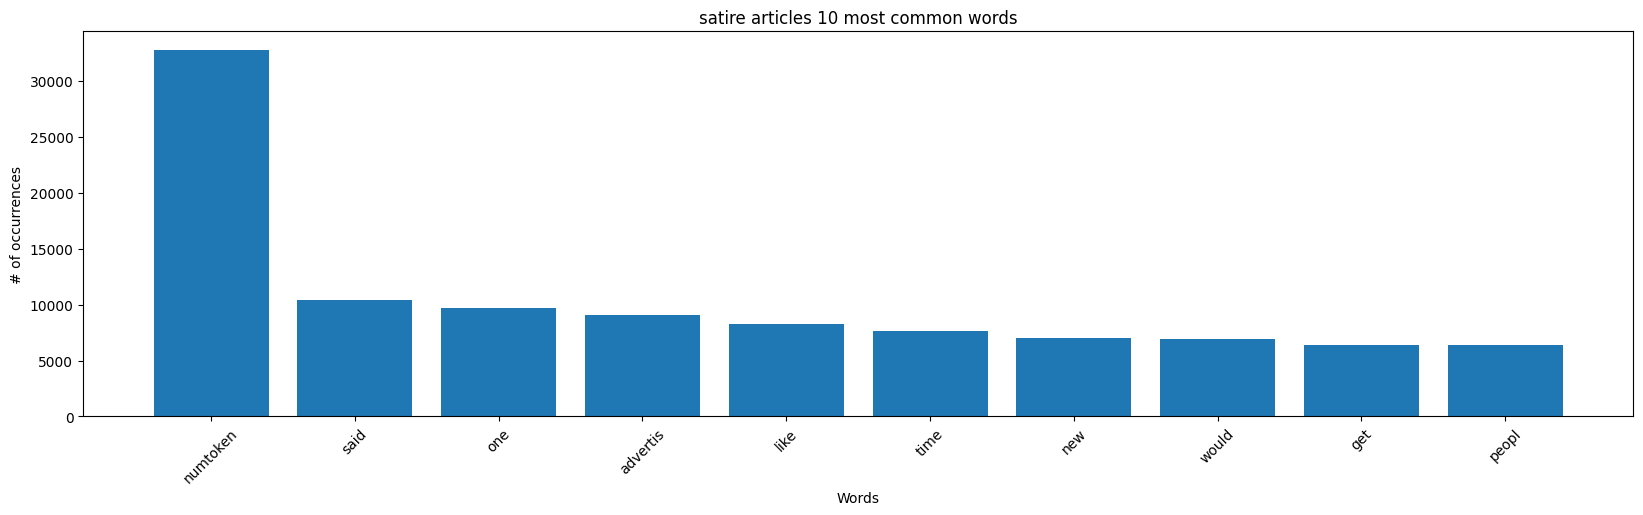

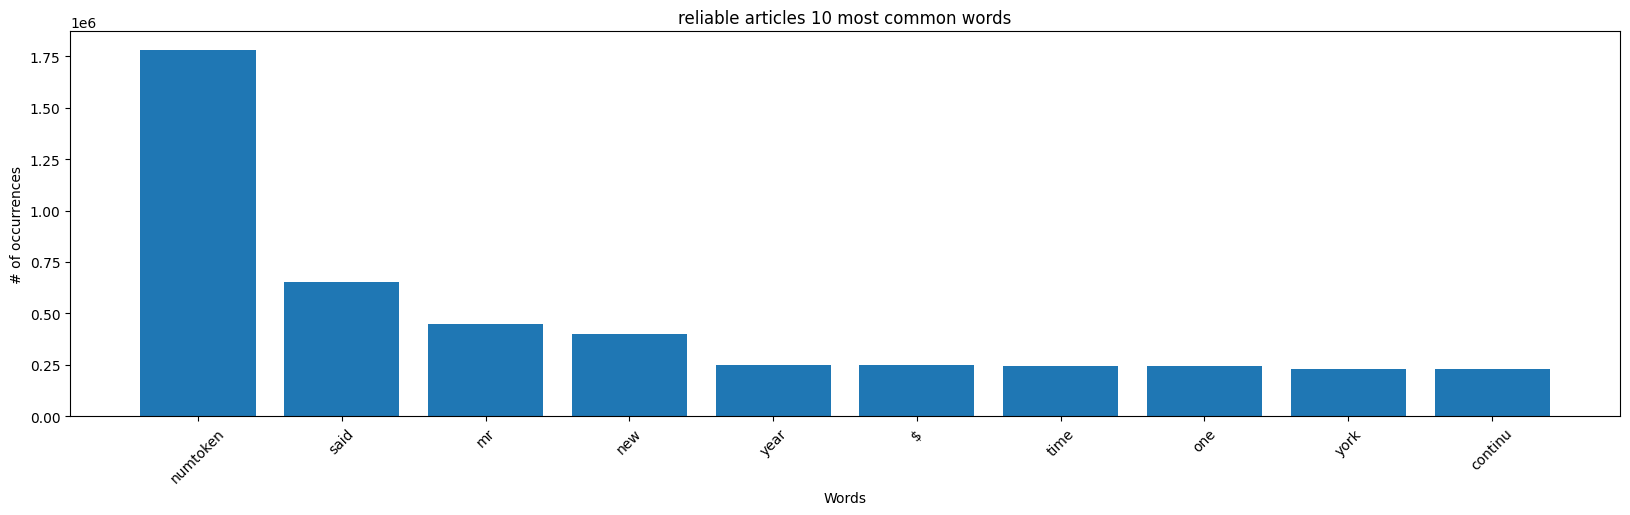

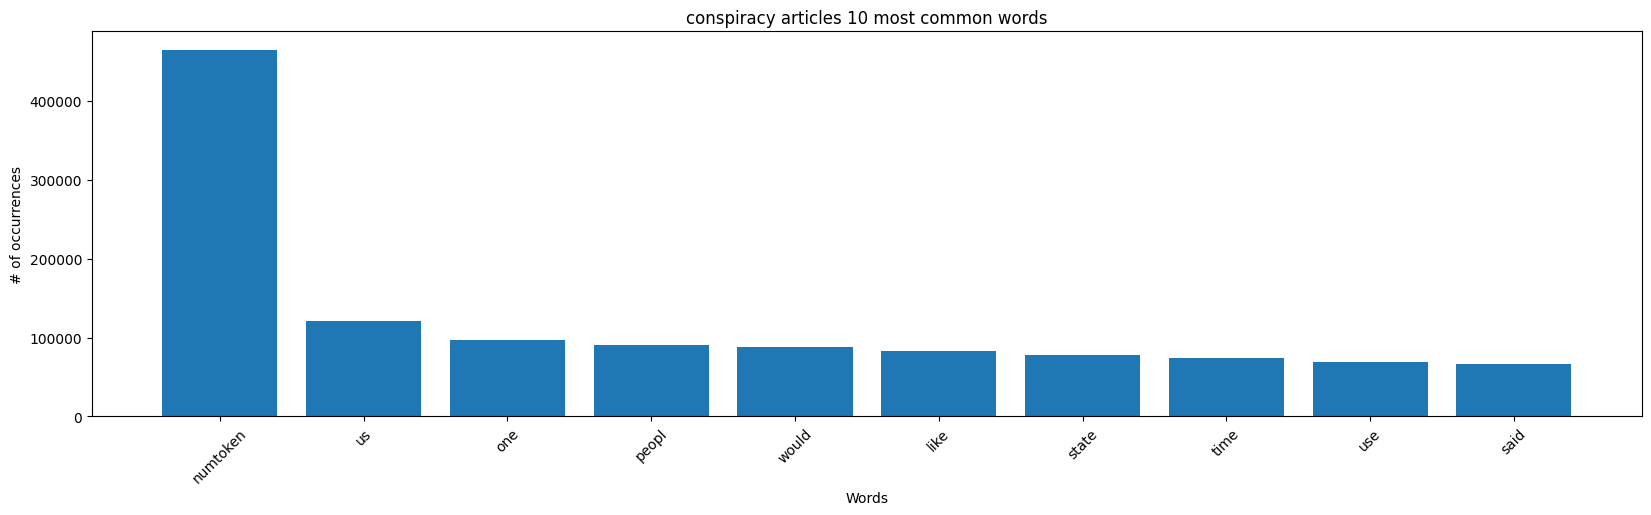

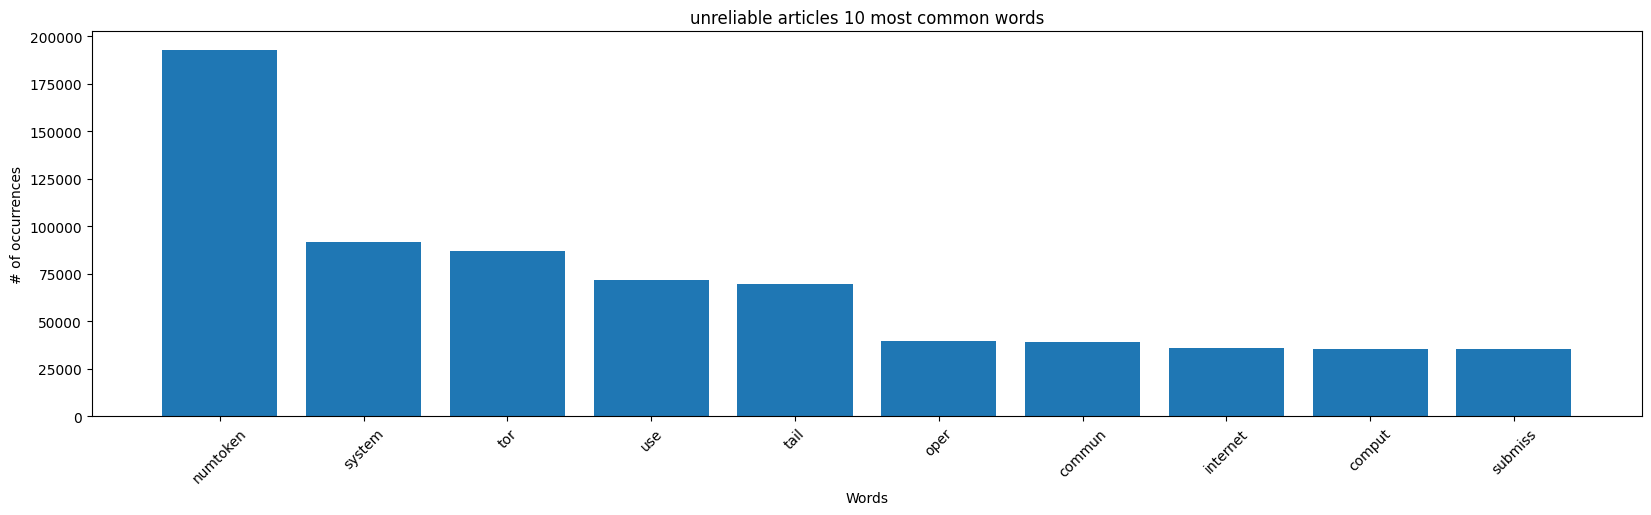

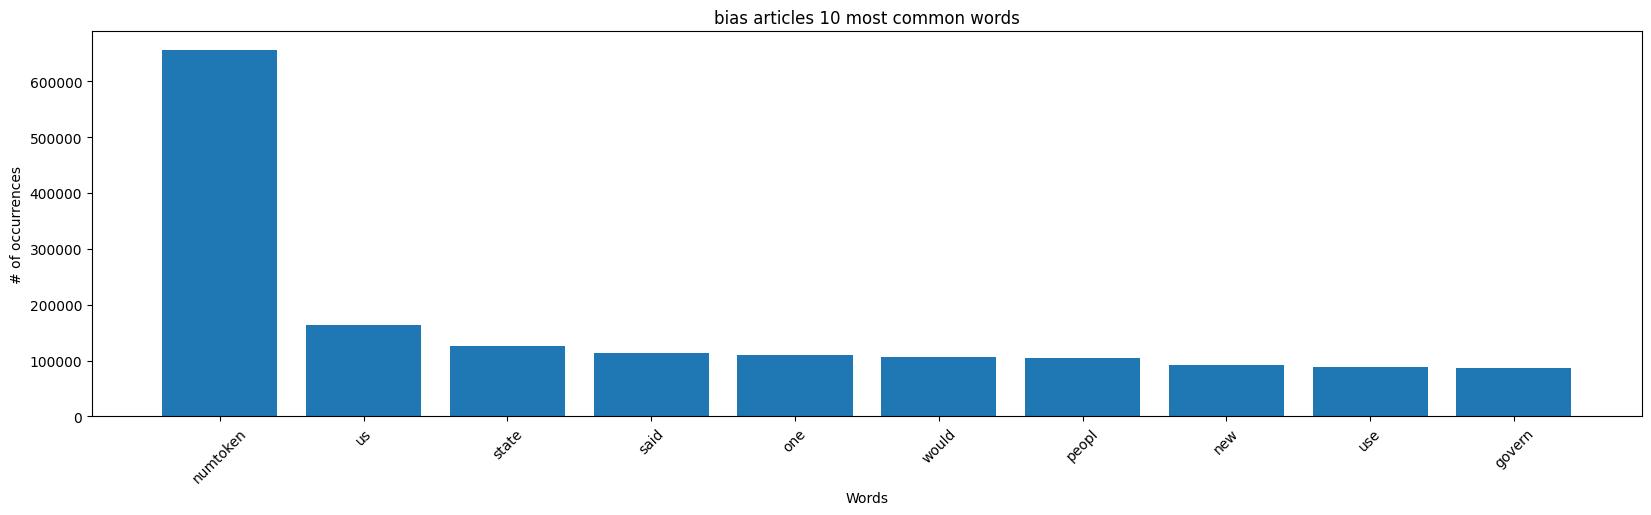

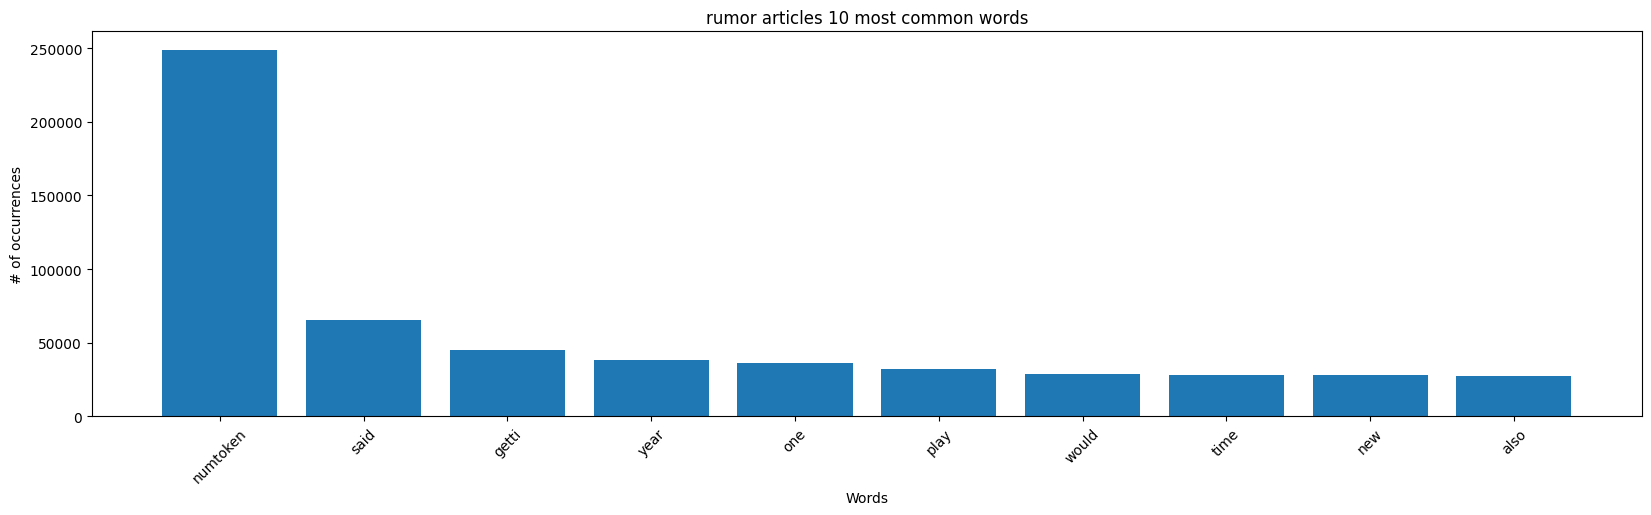

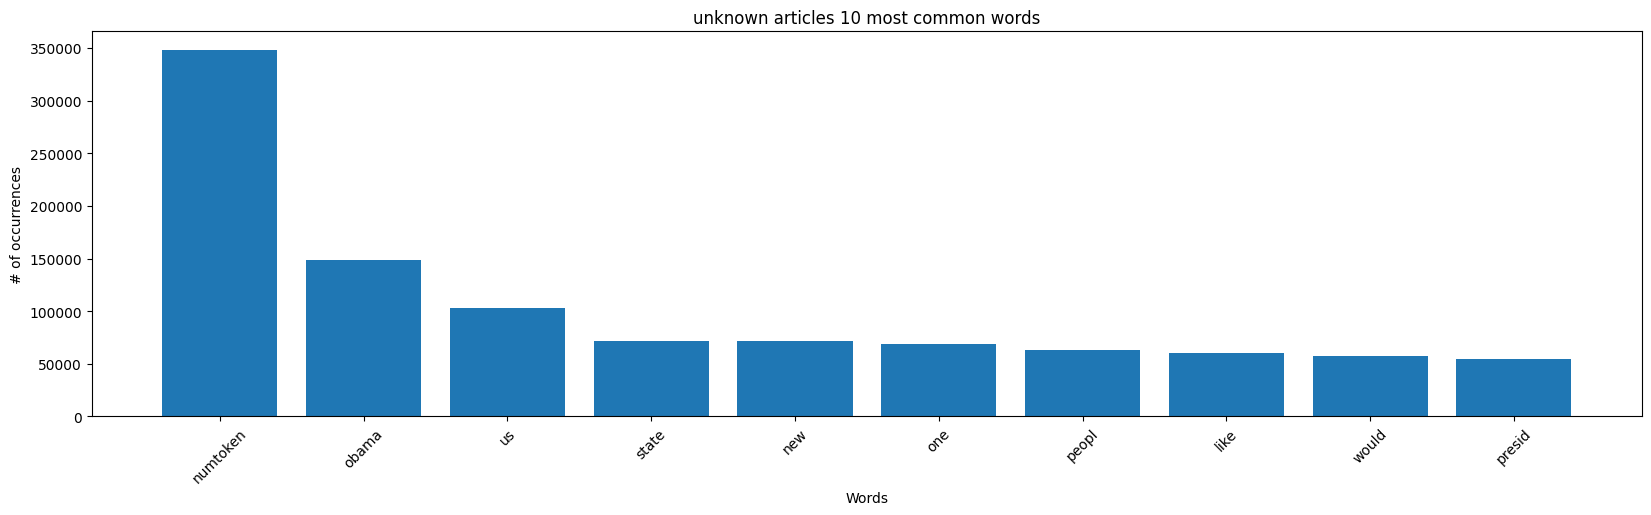

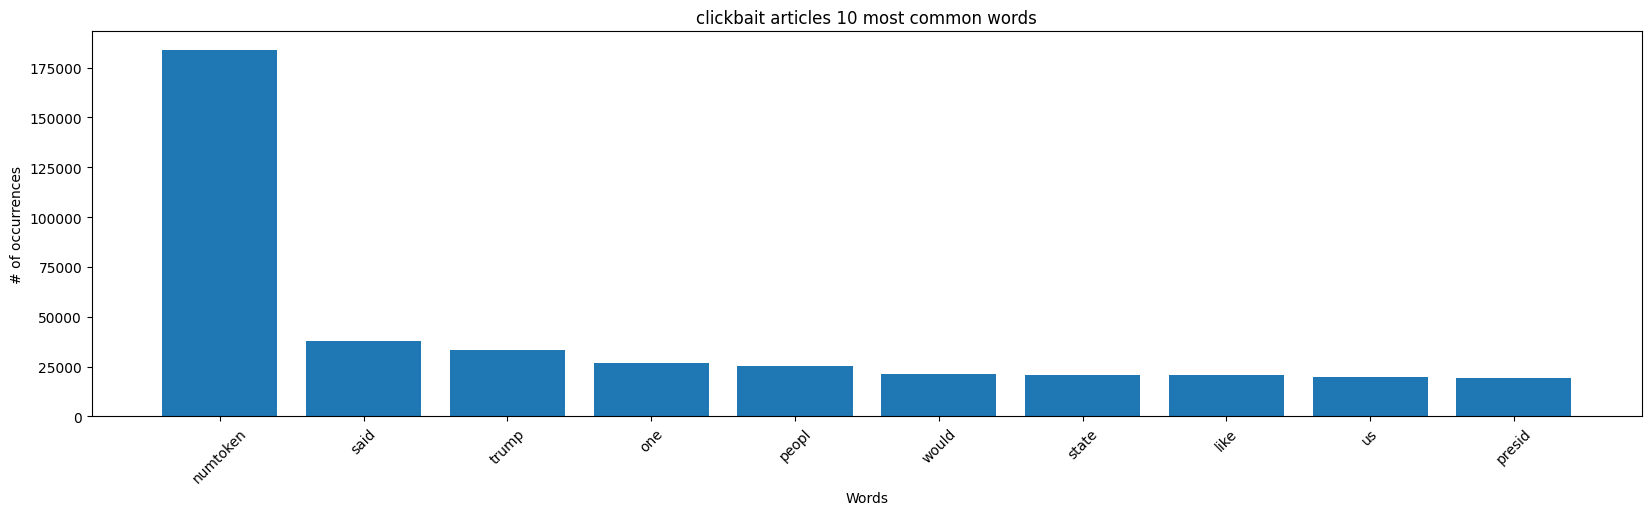

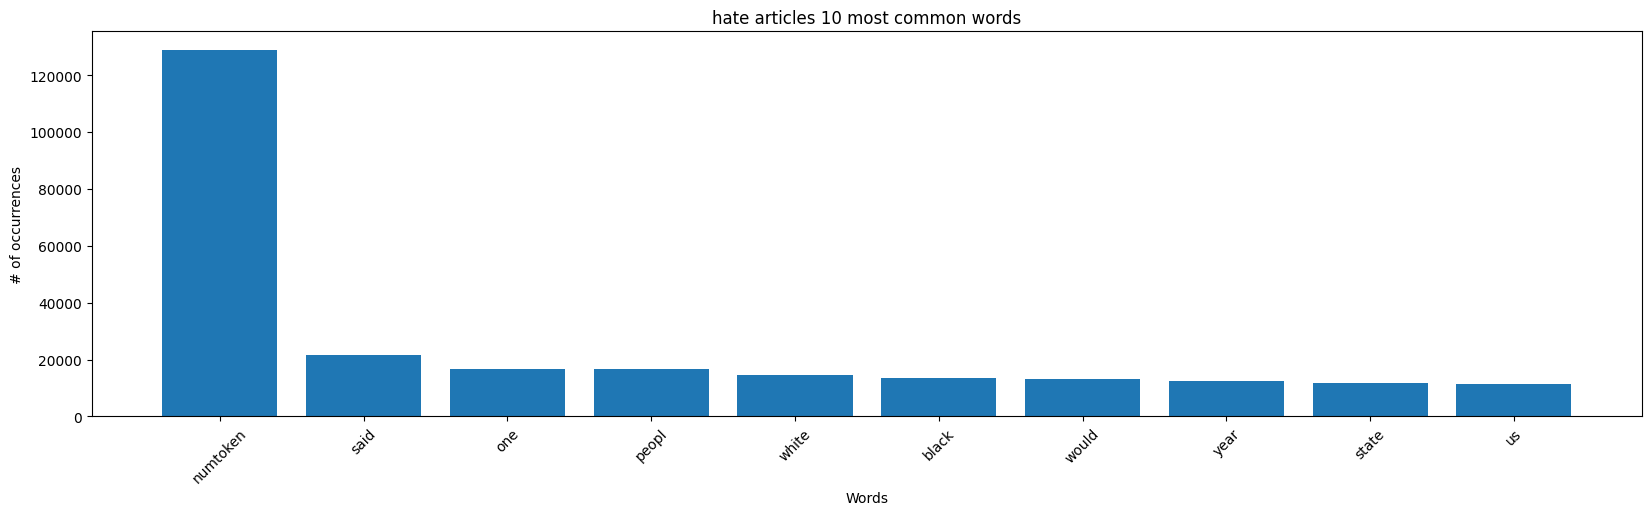

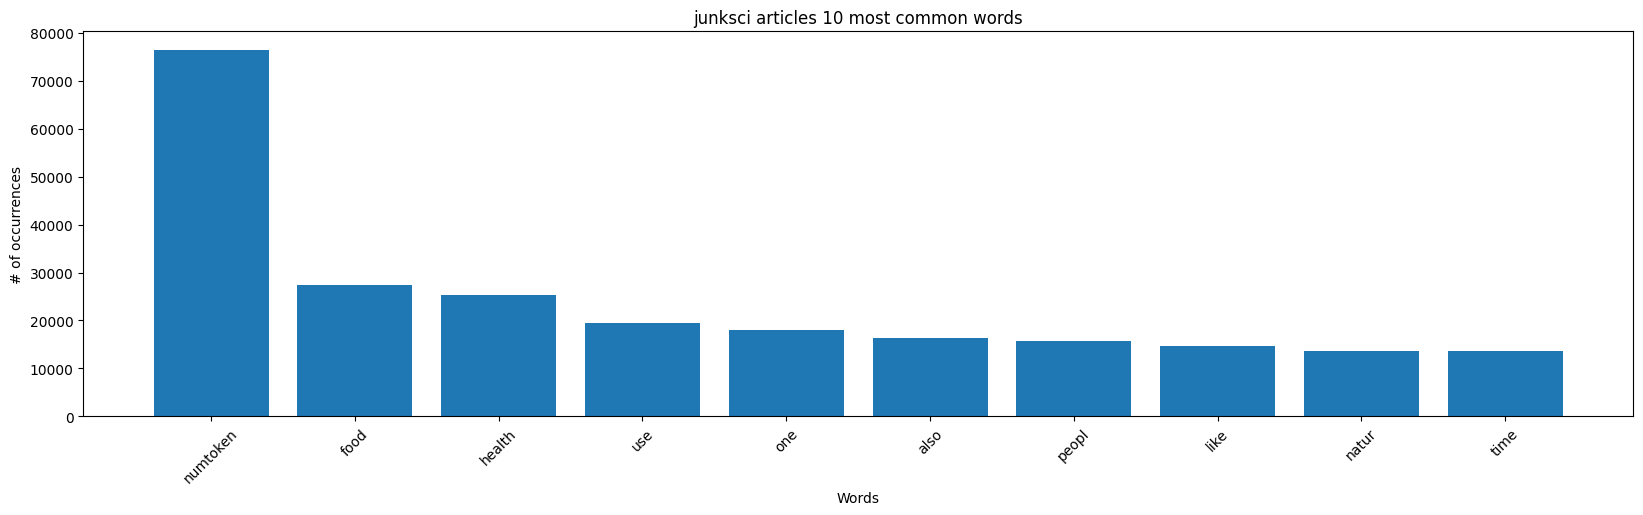

In [10]:
output_dir = 'data/common_words_by_type'
os.makedirs(output_dir, exist_ok=True)

for type in df['type'].unique():
    type_word_counts = {}
    for content in df[df['type'] == type]['content']:
        for word in content:
            if word in type_word_counts:
                type_word_counts[word] += 1
            else:
                type_word_counts[word] = 1
    fig1 = plt.figure(figsize=(20, 5))
    ax1 = fig1.add_subplot(111)
    ax1.bar(*zip(*sorted(type_word_counts.items(), key=lambda x: x[1], reverse=True)[:10]))
    ax1.set_title(f'{type} articles 10 most common words')
    ax1.set_xlabel('Words')
    plt.xticks(rotation=45)
    ax1.set_ylabel('# of occurrences')
    fig1.savefig(f'{output_dir}/{type}10_most_common_words.png')
    fig1.show()